In [6]:
from datetime import timedelta,datetime
from dotenv import dotenv_values
import io
import numpy as np
import os
import psycopg2
from randimage import get_random_image,show_array
import pandas as pd
from PIL import Image
from hashlib import sha256
import base64

In [12]:
conn = psycopg2.connect(**dotenv_values(".env.dev"))
conn.autocommit = True
cur = conn.cursor()

In [13]:
cur.execute("SELECT version();")
cur.fetchone()

('PostgreSQL 17.2 on x86_64-windows, compiled by msvc-19.41.34123, 64-bit',)

In [17]:
cur.execute("SELECT COUNT(*) FROM bike;")
cur.fetchone()

(0,)

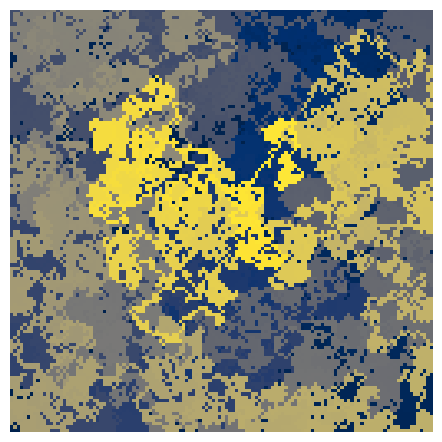

array([[[0.255731, 0.302409, 0.422814],
        [0.255731, 0.302409, 0.422814],
        [0.255731, 0.302409, 0.422814],
        ...,
        [0.335073, 0.359474, 0.427605],
        [0.335073, 0.359474, 0.427605],
        [0.335073, 0.359474, 0.427605]],

       [[0.255731, 0.302409, 0.422814],
        [0.514226, 0.505546, 0.47264 ],
        [0.514226, 0.505546, 0.47264 ],
        ...,
        [0.335073, 0.359474, 0.427605],
        [0.335073, 0.359474, 0.427605],
        [0.335073, 0.359474, 0.427605]],

       [[0.255731, 0.302409, 0.422814],
        [0.514226, 0.505546, 0.47264 ],
        [0.514226, 0.505546, 0.47264 ],
        ...,
        [0.335073, 0.359474, 0.427605],
        [0.335073, 0.359474, 0.427605],
        [0.335073, 0.359474, 0.427605]],

       ...,

       [[0.656114, 0.61678 , 0.452702],
        [0.      , 0.135112, 0.304751],
        [0.656114, 0.61678 , 0.452702],
        ...,
        [0.744664, 0.687181, 0.420393],
        [0.744664, 0.687181, 0.420393],
        [

In [9]:
img = get_random_image((128,128))
show_array(img)
img

In [10]:
def ndarray_to_base64(ndarray):
    # 将 ndarray 转换为 Pillow 图像对象
    image = Image.fromarray((ndarray*255).astype(np.uint8))

    # 将图像保存到字节流中
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")  # 你可以选择其他格式，例如 "JPEG"
    img_bytes = buffered.getvalue()

    # 将字节流编码为 Base64
    base64_encoded = base64.b64encode(img_bytes).decode('utf-8')

    return base64_encoded

In [11]:
ndarray_to_base64(img)

'iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAABIf0lEQVR4nI1dd5gURfp+qydtGmARQZCkp8jCguSowpIzsmRMZMRdgoISlNM7FcEDgQVEMmciCLtIDsKiSJIliMASPA8kCIiAzM7spO76/fF1V1f3zHq/7+mnn5qanu7q9/1She5hGd2zAABo09CLEsTjBoDth3ydm5d4jCxvrLgAoHXNip1b6MdvP+jr3MK7/aDP4zIPC0XMMucAkJmRIn8EwJh5zLYDRVRwOvRa6Uu7uF0AkHuWZdbiuT9JVwIHGMD/4gS967o2nAr3rusGsOHHIJhi+TrwG5Iq2msSHpAr+jXw0l1Q+8XtxIoCoE1Db5uG3r3HfBzgRtOEyOhvP+Qr8UySzBxaY+bQGoQ4DPRjD5PJYMyCPrWbMUvTu7RMgYS+TbacvG6WL7LcswxAZi2ee5Zl1nFl1hEXY8a+RPQBEPq6cM1yhA194C/Qt0HPmEWlQASQZFgtwOOGx429x0zEIyraNfEC2H7IR0xwaTNbCwDYccinaUAM+rLWhyIWDvSfc2w/WLTtQJFoqI2DqMoBdGyWbPtht3qVBAfdHucEfe5ZBjVsnIr3rusSm/xb8dFWv+FUGEzp/WQCuGZuNtHC9hqrDiEe7kKcts/5x3xtGno9Bv2xPiei6pXbD/k6NPXuOuLr1NwLQNXgUEz0OzT1AujYzKtI5iuY2HvUB8MCOEeCGwC2HSjq0jKFMXRukYJ4ZksuqGtL3VBi76hbvUpbLrJuj5u/zKzFARfBYVFqSQyVd204FQFgOp9TYQhTkL0Q18AUYqLPkwmAG8D6k0UA+tRLAaBpnJWEN7Vc8kuMYkCbhl7b/SZYWxtRzfI3P/gAEMRCCGjN0I9dR3ziAMXqQgGQa3I7zdaQkJOJhZ4xO/oAdh722+5yy0UGoNvjfMu5MByezFo896cwMZVZx5X7U0RW8A2n9I+Eu14+46Bve9dWYZBBe7r

In [40]:
data = pd.read_csv(os.path.join(os.curdir,'data','processed.csv'))
data = data.astype({'start_time':'datetime64[ns]','end_time':'datetime64[ns]'}).rename(columns={'bikeid':'bike_id'})

In [48]:
data.groupby('bike_id').apply(lambda df:df.sort_values(by='end_time',ascending=False).head(1))

C:\Users\15800\AppData\Local\Temp\ipykernel_41100\4151262783.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('bike_id').apply(lambda df:df.sort_values(by='end_time',ascending=False).head(1))


,,bike_id,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y
bike_id,,,,,,,,
1000029WpgSijwpInxt2,83250,1000029WpgSijwpInxt2,2016-08-08 19:10:00,121.424,31.178,2016-08-08 19:17:00,121.427,31.186
100007SbQJXNzbYbzkzG,36127,100007SbQJXNzbYbzkzG,2016-08-27 08:06:00,121.422,31.333,2016-08-27 08:13:00,121.430,31.332
100014O6jvPcrFa7MlU6,12366,100014O6jvPcrFa7MlU6,2016-08-18 20:29:00,121.478,31.199,2016-08-18 20:37:00,121.468,31.205
100018psZLCOk3iXxTcc,94081,100018psZLCOk3iXxTcc,2016-08-15 17:48:00,121.349,31.152,2016-08-15 18:00:00,121.360,31.142
100019MapnJHW5EVi6OV,27056,100019MapnJHW5EVi6OV,2016-08-15 22:52:00,121.535,31.321,2016-08-15 22:59:00,121.532,31.330
...,...,...,...,...,...,...,...,...
999824Jzm8aFxeIBClwe,61456,999824Jzm8aFxeIBClwe,2016-08-20 23:33:00,121.538,31.328,2016-08-20 23:53:00,121.529,31.336
99989GWSa8tS2HJO930z,30167,99989GWSa8tS2HJO930z,2016-08-24 22:06:00,121.449,31.193,2016-08-25 00:37:00,121.453,31.194
99992wbZr6wL6tMetEMQ,6073,99992wbZr6wL6tMetEMQ,2016-08-17 12:19:00,121.545,31.297,2016-08-17 12:29:00,121.548,31.307


In [51]:
data.bike_id.unique()

array(['158357NSqrL1JDPvXTU9', '92776nsU9MrxaXPDhT5E',
       '152045VxGUdiVjqOzNjS', ..., '3225362ayDToBOOlFbxf',
       '179530HwEzA1PH9ZX4vs', '167419aUYHR05cQdgTcd'], dtype=object)

In [52]:
data.sample(100)

,bike_id,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y
31935,38947iuMMb7CHAap14nn,2016-08-30 08:18:00,121.499,31.220,2016-08-30 08:24:00,121.502,31.221
64159,326370z0TzwK6dp2y8w2,2016-08-25 17:20:00,121.334,31.082,2016-08-25 18:20:00,121.321,31.126
34059,30514xLV3fSgPCpuPTIQ,2016-08-11 08:40:00,121.528,31.301,2016-08-11 08:55:00,121.508,31.304
97987,107624bbmRftNRUfMIbW,2016-08-10 17:37:00,121.469,31.264,2016-08-10 17:54:00,121.450,31.260
40225,78180t2fqWuvBaR6WBQ3,2016-08-07 18:53:00,121.465,31.272,2016-08-07 19:05:00,121.459,31.290
...,...,...,...,...,...,...,...
73084,1814907Cfxm8m9DUZYCF,2016-08-24 07:41:00,121.544,31.293,2016-08-24 07:56:00,121.553,31.280
69285,61669xo3KXMqzO0yBXzr,2016-08-04 06:42:00,121.417,31.157,2016-08-04 06:52:00,121.419,31.167
76300,207079MzHF2SRp4HNH1b,2016-08-29 06:24:00,121.495,31.247,2016-08-29 06:30:00,121.483,31.245
66399,136962hhLVbhDBOEY49f,2016-08-07 16:05:00,121.447,31.206,2016-08-07 16:28:00,121.442,31.192


In [59]:
np.random.randint(0,10,(1,3))

array([[5, 8, 8]], dtype=int32)

In [60]:
np.random.rand(4,3)

array([[0.60806852, 0.39154996, 0.49971866],
       [0.58580969, 0.56305838, 0.27668323],
       [0.44246104, 0.59639049, 0.33913483],
       [0.74055708, 0.9964925 , 0.07426554]])

In [67]:
timedelta(days=365)*np.random.rand(10) + datetime(2015,1,1)

array([datetime.datetime(2015, 5, 28, 17, 12, 57, 134249),
       datetime.datetime(2015, 4, 10, 11, 9, 35, 637118),
       datetime.datetime(2015, 7, 14, 7, 11, 25, 312298),
       datetime.datetime(2015, 12, 20, 0, 4, 50, 559228),
       datetime.datetime(2015, 7, 18, 11, 2, 50, 365758),
       datetime.datetime(2015, 10, 27, 6, 54, 58, 160568),
       datetime.datetime(2015, 11, 4, 7, 51, 54, 834907),
       datetime.datetime(2015, 10, 22, 7, 47, 39, 935856),
       datetime.datetime(2015, 2, 20, 5, 26, 57, 794348),
       datetime.datetime(2015, 5, 22, 11, 19, 33, 879178)], dtype=object)

In [71]:
for row in data.head().itertuples(index=False):
    print(row)

Pandas(bike_id='158357NSqrL1JDPvXTU9', start_time=Timestamp('2016-08-20 06:57:00'), start_location_x=121.348, start_location_y=31.389, end_time=Timestamp('2016-08-20 07:04:00'), end_location_x=121.357, end_location_y=31.388)
Pandas(bike_id='92776nsU9MrxaXPDhT5E', start_time=Timestamp('2016-08-29 19:09:00'), start_location_x=121.508, start_location_y=31.279, end_time=Timestamp('2016-08-29 19:31:00'), end_location_x=121.489, end_location_y=31.271)
Pandas(bike_id='152045VxGUdiVjqOzNjS', start_time=Timestamp('2016-08-13 16:17:00'), start_location_x=121.383, start_location_y=31.254, end_time=Timestamp('2016-08-13 16:36:00'), end_location_x=121.405, end_location_y=31.248)
Pandas(bike_id='196259Ho4odkXSt3qjIm', start_time=Timestamp('2016-08-23 21:34:00'), start_location_x=121.484, start_location_y=31.32, end_time=Timestamp('2016-08-23 21:43:00'), end_location_x=121.471, end_location_y=31.325)
Pandas(bike_id='782087q9Q1VRno42o6pv', start_time=Timestamp('2016-08-16 07:32:00'), start_location_x=

TypeError: Strings must be encoded before hashing